<h3>Python Debugger</h3>

In [4]:
import pdb

def seq(n):
    for i in range(n):
#         pdb.set_trace()
        print(i)
    return

seq(10)

In [ ]:
# Dictionaries can have tuple as keys,
# but not list. It can't have tuple having list as keys either.

def f1(l):
    l = l + [3,4]
    
def f2(l):
    l = l.append(4)
    
l = [1,2]
f1(l)
l

<h3>Decorators</h3>

In [14]:
def login_required(func):
    
    def wrapper(user = None):
        
        if(user is None):
            return "Can not fetch data without login"
        
        res = func(user)
        
        print(f"{user} is requesting data")
        
        return res
        
    return wrapper

@login_required
def getData(user = None):
    return 100
    
getData("Rahul")

# temp = login_required(getData)

# temp("ram")

Rahul is requesting data


100

<h3>Memory Management & Garbage Collection</h3>

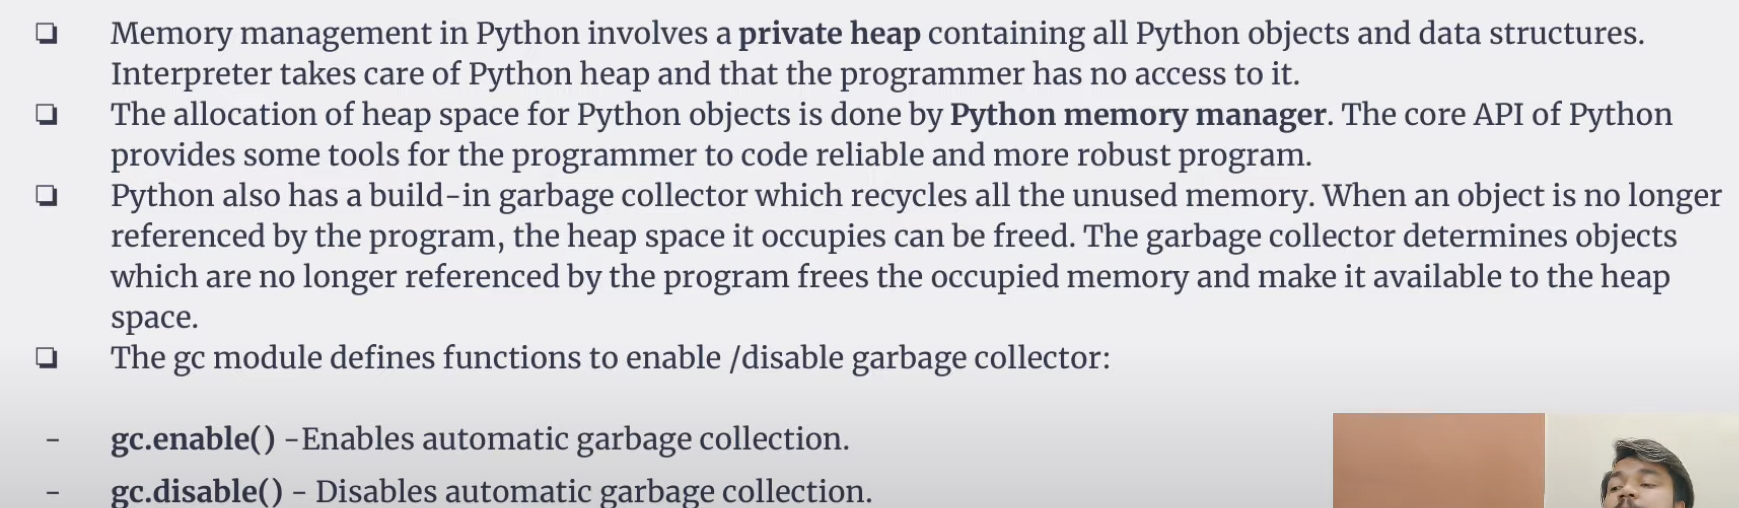

<h3>Generator vs Iterator</h3>

All generators are iterators. Not other way round.

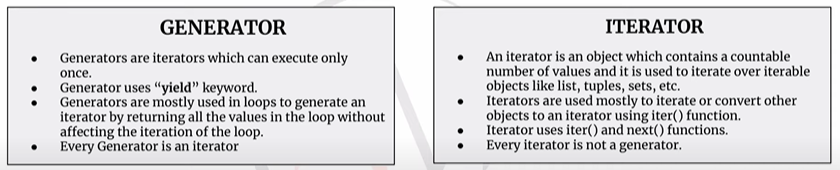

In [15]:
# Iterators:
# List, Tuple, Set, Dictionary etc are iterables, not iterators.
# iterables are objects which contain countable values.
# We can make iterator object using iterable object. (See LLD Notes).
# iteratorObj = iterableObj.iter()

# Now one confusing thing here is, like in Java iteratorObj has 2 methods
# hasNext() and next(). Here an iteratorObj has methods iter() and has next().
# There is no hasNext() here.


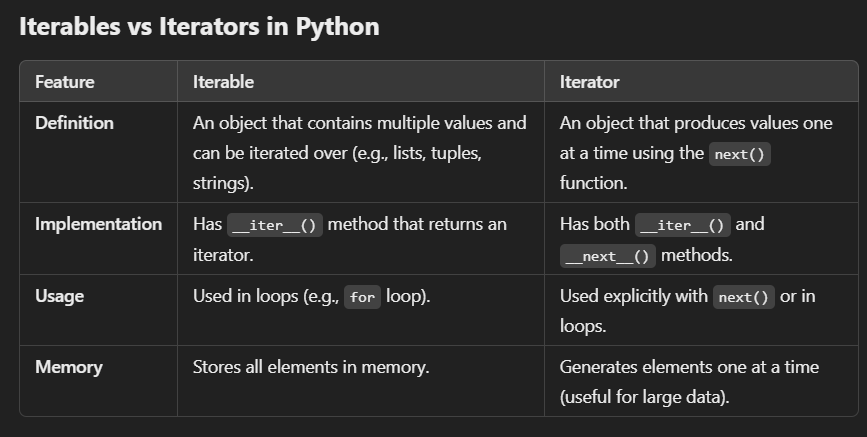

In [34]:
def generatorFunc(start):
    yield start # Function pauses at yield
    start = start+1
    yield start
    
    # return # if we enable this we will only get till 11

    start = start+1
    yield start
    
    
    
g = generatorFunc(10)
print(type(g))
print(g)

print(next(g))
print(next(g))
print(g.__next__()) # Same as next(g)

print(next(g)) # Will throw StopIteration Exception

<class 'generator'>
<generator object generatorFunc at 0x000001B1EA587F20>
10
11
12


StopIteration: 

In [36]:
g2 = generatorFunc(10)

for item in g2: # We will not get StopIteration Exception.
    print(item)
    
# If we use the return statement. We will get 10 11 only.
#  Real use case: Reading File and yield-ing line one by one.

10
11
12


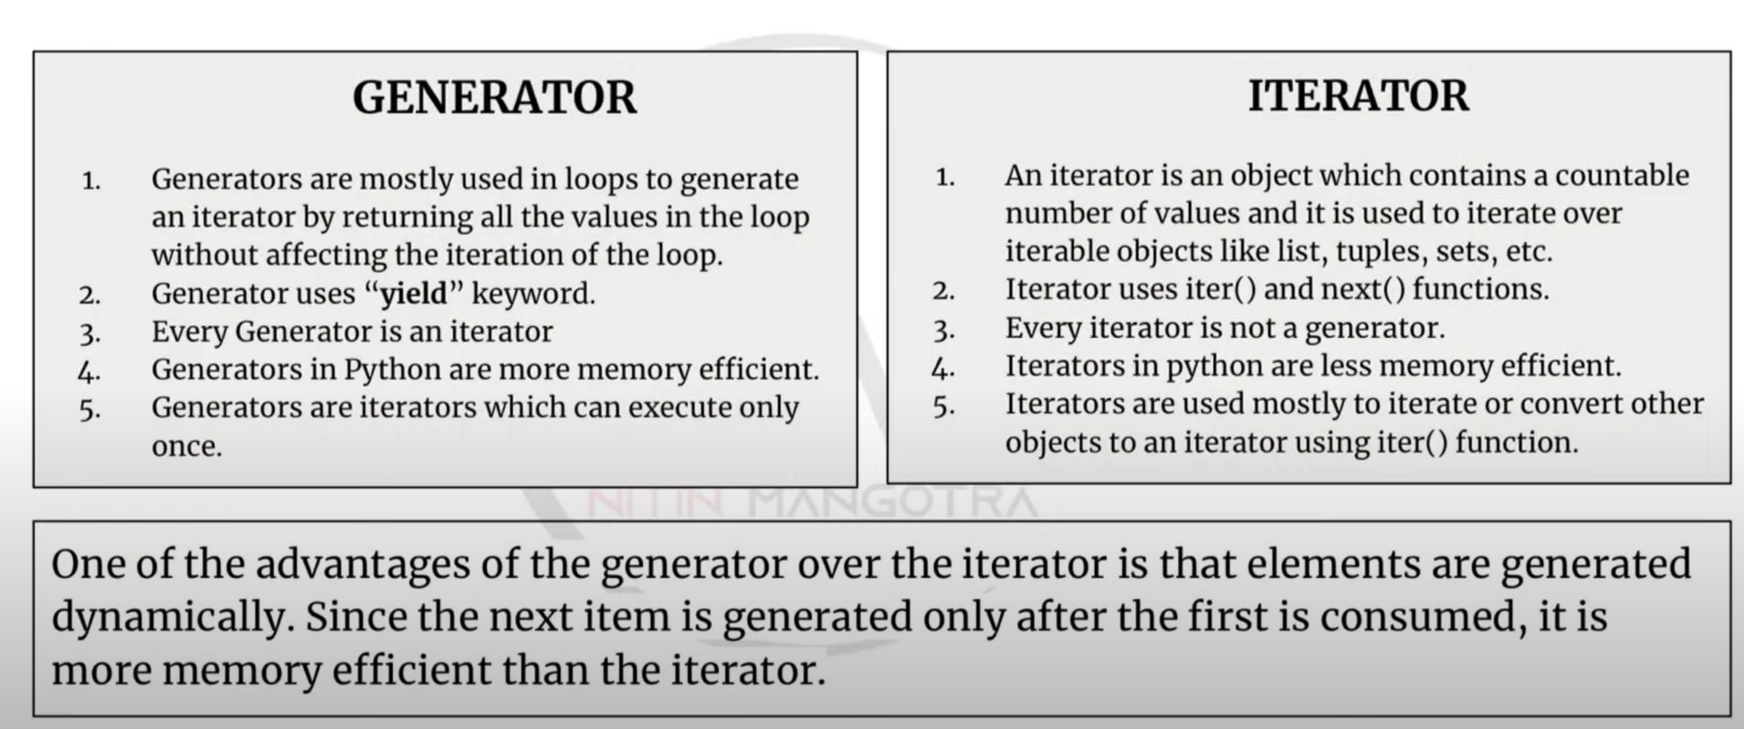

In [46]:
l = [1,2,3,4,5,6]
iteratorObj = iter(l)

# List is not iterator, it is iterable.
# next(l) # Will throw TypeError Exception.

print(iteratorObj)

print(next(iteratorObj))
print(next(iteratorObj))
print(next(iteratorObj))
print(next(iteratorObj))


1
2
3
4


In [42]:
# Ex. of a infinite generator

def gen(start):
    while(True):
        yield start
        start += 1
    
g = gen(10)

for i in range(5):
    print(next(g))

10
11
12
13
14


In [4]:
# Ternary:
x = 50
y = 10 if x > 5 else 20
y

10

In [15]:
# Inheritance:

class A:
    def __init__(self,x,y):
        self.val1 = x
        self.val2 = y
    def summ(self):
        return self.val1 + self.val2
    
class B(A):
    def __init__(self,x,y):
        super().__init__(x,y)
    def getSumm(self):
        return super().summ()
    
bObj = B(10,20)

bObj.getSumm()

30

In [7]:
class Parent(): 
    
    def show(self): 
        print("Inside Parent") 
        
class Child(Parent): 
    
    def show(self): 
        
        # Calling the parent's class method 
        super().show() 
        print("Inside Child") 
        
# Driver's code 
obj = Child() 
obj.show() 

Inside Parent
Inside Child


<h3> Python difference local, global, nonlocal. </h3>

In Python, local, global, and nonlocal refer to variable scopes:

i) Local Scope: A variable declared inside a function is local to that function.

ii) Global Scope: A variable declared outside any function is global and accessible inside functions using the global keyword.

iii) Nonlocal Scope: Used inside nested functions, nonlocal allows modifying a variable from the enclosing function (not global).


In [17]:
x = "global variable"  # Global variable

def outer_function():
    x = "outer function variable" 
    # Enclosing (nonlocal) variable wrt inner_function()

    def inner_function():
        nonlocal x
        x = "modified by inner function" 
        # Modifies the outer function variable
        print("Inside inner_function:", x)

    inner_function()
    print("Inside outer_function:", x)


def local_example():
    x = "modified locally. so no effect"
    
def modify_global():
    global x
    x = "modified globally"
    

# Calling functions
outer_function()
print("Global x before modification:", x)
local_example()
print("Global x after calling local example:", x)
modify_global()
print("Global x after modification:", x)

# x inside inner_function modifies x from outer_function using nonlocal.
# modify_global() changes the global x using global

Inside inner_function: modified by inner function
Inside outer_function: modified by inner function
Global x before modification: global variable
Global x after calling local example: global variable
Global x after modification: modified globally


<h3>Closures in Python</h3>

In [22]:
# Example of Closure Without nonlocal

def outer():
    x = 10 # Enxlosing variable
    def inner():
        print("Inside inner: ", x)
    return inner

closure_func = outer()
closure_func()

Inside inner:  10


In [27]:
# Example of Closure With nonlocal

def outer():
    x = 10
    
    def inner():
        nonlocal x
        x = x + 1
        print("counter is ", x)
    return inner

closure_f = outer()

closure_f() # Modifies x
closure_f() # Modifies x again
closure_f()
closure_f()

counter is  11
counter is  12
counter is  13
counter is  14


Closures allow inner functions to "remember" variables from their enclosing scope.

nonlocal allows modifying these remembered variables inside inner functions.

Without nonlocal, Python assumes a variable inside a function is local, leading to potential UnboundLocalError.

Why do we need closures?

✅ Encapsulation: Keeps state private without using global variables.
✅ Function Factories: Generates dynamic functions (e.g., multiplier(n)).
✅ Decorators: Enhances function behavior without modifying them.
✅ Callbacks: Stores execution context for later use.


<h3>Function of List, Set, Tuple & Dictionary</h3>

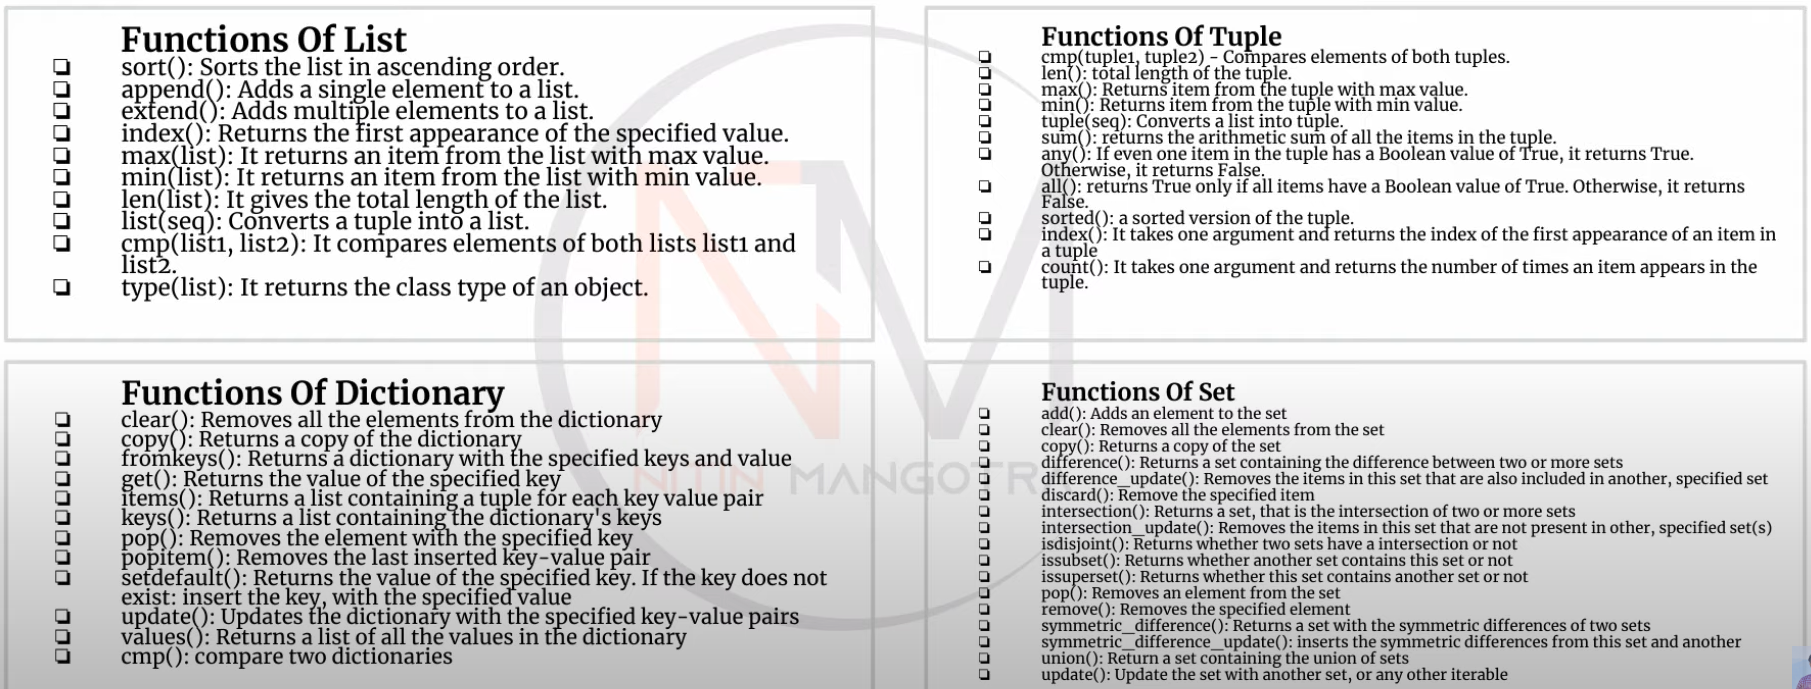

cmp() is not there in Python3 anymore.

In [52]:
# ASCII -> Char

ch = 'a'
offset = ord('a')
x = chr(offset + 1)

type(x)

def example_function(*args, **kwargs):
    print(type(args))
    print(type(kwargs))
    print("Positional arguments (*args):", args)
    print("Keyword arguments (**kwargs):", kwargs)

# Calling the function with both *args and **kwargs
example_function(1, 2, 3, name="Alice", age=25)

# Slicing:

s = "helloworld"

print(s[8:1:-1]) # Will go from L to R

<class 'tuple'>
<class 'dict'>
Positional arguments (*args): (1, 2, 3)
Keyword arguments (**kwargs): {'name': 'Alice', 'age': 25}
lrowoll


In [44]:
mp = {'a' : 10, 'b' : 20}

mp.items()

dict_items([('a', 10), ('b', 20)])

<h3>Multiple Inheritance, Diamond Problem</h3>

In [47]:
class A:
    def show(self):
        print("I am A")
        
class B(A):
    def show(self):
        print("I am B")

class C(A):
    def show(self):
        print("I am C")
        
class D(B, C):
    pass

dObj = D()
dObj.show() # We may think it is ambiguous. But it is resolved using
# sequential evaluation. See D(B, C) -> B is before C.

I am B


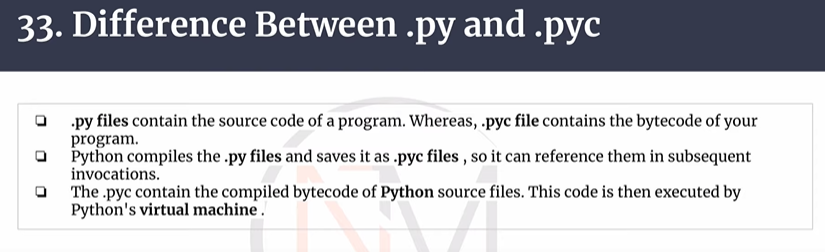

In [55]:
t1 = 1,
t2 = 1,

print(id(t1))
print(id(t2))

2359520315328
2359507583184


<h3>_a, __a, __a__ in Python:</h3>

In [57]:
# __a__ is Dunder. See operator overloading:

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):  # Overloading `+`
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other):  # Overloading `-`
        return Point(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):  # Overloading `*`
        return Point(self.x * scalar, self.y * scalar)

    def __truediv__(self, scalar):  # Overloading `/`
        return Point(self.x / scalar, self.y / scalar)

    def __str__(self):  # String representation
        return f"({self.x}, {self.y})"

p1 = Point(2, 3)
p2 = Point(4, 5)

print(p1 + p2)  # (6, 8)
print(p1 - p2)  # (-2, -2)
print(p1 * 2)   # (4, 6)
print(p2 / 2)   # (2.0, 2.5)


(6, 8)
(-2, -2)
(4, 6)
(2.0, 2.5)


In [58]:
# _a is for private variables:
class MyClass:
    def __init__(self):
        self.__private_var = 99  # Name-mangled variable

obj = MyClass()
# print(obj.__private_var)  # ❌ AttributeError: No such attribute

# But it is actually renamed to:
print(obj._MyClass__private_var)  # ✅ Works (Not recommended)


99


<h3>Map, Filter, Reduce:</h3>

In [66]:
def sq(x):
    return x*x

nums1 = [1,2,3,4]
nums2 = [10,20,30,40]

# squared = list(map( sq , nums))
summed = list(map(lambda x,y: x+y , nums1, nums2))

summed

[11, 22, 33, 44]

In [73]:
nums1 = [1,2,3,4,5,6,7,8,9,10]

divisibleBy3 = list(filter(lambda x : x%3 == 0, nums1))
divisibleBy3

[3, 6, 9]

In [78]:
from functools import reduce

nums1 = [1,2,3,4,5]

summ = reduce(lambda x,y : x + y, nums1, 100)

summ

115

In [76]:
# Taking multiple inputs:

x = [int(x) for x in input("Enter comma separated numbers: ").split(",")]

sum(x)

Enter comma separated numbers:  1,2,3,4,5


15

<h3>Assignment, shallow copy and deep copy:</h3>

In [77]:
import copy

original = [[1, 2, 3], [4, 5, 6]]

# Assignment (No copy, just reference)
assigned = original

# Shallow Copy
shallow_copied = copy.copy(original)

# Deep Copy
deep_copied = copy.deepcopy(original)

# Modify Original
original[0][0] = 99

print("Original:       ", original)       # [[99, 2, 3], [4, 5, 6]]
print("Assigned:       ", assigned)       # [[99, 2, 3], [4, 5, 6]] (Same reference)
print("Shallow Copy:   ", shallow_copied) # [[99, 2, 3], [4, 5, 6]] (Nested objects shared)
print("Deep Copy:      ", deep_copied)    # [[1, 2, 3], [4, 5, 6]] (Fully independent)


# ✔️ Shallow Copy creates a new top-level object but shares nested objects.
# ✔️ Deep Copy creates a fully independent duplicate.
# Assignment (No copy, just reference)



Original:        [[99, 2, 3], [4, 5, 6]]
Assigned:        [[99, 2, 3], [4, 5, 6]]
Shallow Copy:    [[99, 2, 3], [4, 5, 6]]
Deep Copy:       [[1, 2, 3], [4, 5, 6]]


<h3>Namespace, __name__ == __main__ meaning</h3>

In [ ]:
# Python program to execute 
# main directly 
print ("Always executed")
 
if __name__ == "__main__": 
    print ("Executed when invoked directly")
else: 
    print ("Executed when imported")

<h3> Static vs Class Methods.Abstract Class, Abstract Method. </h3>

In [90]:
class Employee:
    company_name = "TechCorp"  # Class attribute
    
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary

    @staticmethod
    def is_working_day(day):
        """Static method: Checks if a given day is a working day."""
        return day.lower() not in ["saturday", "sunday"]

    @classmethod
    def change_company(cls, new_name):
        """Class method: Changes the company name."""
        cls.company_name = new_name

# Using static method
print(Employee.is_working_day("Monday"))   # Output: True
print(Employee.is_working_day("Sunday"))   # Output: False

# Using class method
print(Employee.company_name)  # Output: TechCorp
Employee.change_company("NewTech")
print(Employee.company_name)  # Output: NewTech

# See, classmethod takes cls, staticmethod does not.So it does not
# have access to class attributes.

True
False
TechCorp
NewTech


In [91]:
# An abstract class cannot be instantiated directly.

# It forces subclasses to implement certain methods.

# Abstract methods act as placeholders that must be defined in 
# derived classes.

from abc import ABC, abstractmethod

class Animal(ABC):  # Abstract Class
    @abstractmethod
    def make_sound(self):
        pass  # Abstract Method (must be implemented in subclasses)

class Dog(Animal):  
    def make_sound(self):  
        return "Woof Woof!"

# animal = Animal()  # ❌ Error: Cannot instantiate an abstract class
dog = Dog()
print(dog.make_sound())  # Output: Woof Woof!

# Use ABC (Abstract Base Class) from abc module.

# An abstract class can have concrete methods but must
# have at least one @abstractmethod.

# Subclasses must implement all abstract methods.


Woof Woof!


<h3> Python collections Module. Heaps in Python. Custom Sort. </h3>

In [4]:
from collections import Counter

fruits = ["apple", "banana", "apple", "orange", "banana", "apple"]

countMap = Counter(fruits)

# countMap['apple']

countMap

Counter({'apple': 3, 'banana': 2, 'orange': 1})

In [14]:
from collections import defaultdict
# Automatically assigns a default value to missing keys.
countMap = defaultdict(int)

countMap["Hi"] # Will give 0.

adjList = defaultdict(list)

adjList["NodeA"] # Will give [].

# Say we need default value to be 100.

customMap = defaultdict(lambda: 100)

customMap["Hi"]

# We have OrderedDict which Keeps track of the insertion order of keys.

100

In [12]:
from collections import deque

dq = deque([])

dq.append(1)
dq.append(2)

dq.appendleft(3)

print(dq)

# dq.pop()

dq.popleft()

print(dq)

deque([3, 1, 2])
deque([1, 2])


In [13]:
from collections import namedtuple

# Define a namedtuple type
Person = namedtuple("Person", ["name", "age", "city"])

# Create instances
p1 = Person(name="Alice", age=30, city="New York")
p2 = Person("Bob", 25, "San Francisco")

print(p1.name, p1.age)  # Output: Alice 30
print(p2.city)          # Output: San Francisco


Alice 30
San Francisco


In [4]:
# Heaps in Python: heapq

import heapq
nums = [10, 20, 5, 7, 30, 2]

heapq.heapify(nums)

heapq.heappush(nums, 17)

while(len(nums) > 0):
    topItem = heapq.heappop(nums)
    print(topItem)

2
5
7
10
17
20
30


In [20]:
# Heap of custom Class. (Priority Queue)

import heapq

class Task:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    def __lt__(self, task2):
        if(self.start > task2.start):
            return True
        elif(self.start == task2.start):
            return self.end > task2.end
        else:
            return False

jobs = [[10,20],[8,22],[11,19],[11,17]]

tasks = []

for job in jobs:
    tasks.append(Task(job[0], job[1]))

heapq.heapify(tasks)

# while(len(tasks) > 0):
#     topItem = heapq.heappop(tasks)
#     print(topItem.start, topItem.end)
    
# Custom sorting can be used like this also.
sorted(jobs) # Does not change the jobs list.
for task in sorted(tasks): # So, it uses the dunder __lt__() method.
    print(task.start, task.end)

11 19
11 17
10 20
8 22


In [24]:
# Another way to custom sort is following:
jobs = [[10,20],[8,22],[11,19],[11,17]]
# I want to sort desc based on first value 
# and if clashed I want to sort asc using 2nd value.

sorted(jobs, key = lambda x : (x[0], -x[1]))

# CAn use reverese = True to get the result reversed.

[[8, 22], [10, 20], [11, 19], [11, 17]]

<h3>Multithreading, Multiprocessing, GIL in Python</h3>

i) The GIL is a mechanism in CPython (the most common Python interpreter) that prevents multiple threads from executing Python bytecode simultaneously.

ii) This means that even if you have multiple threads, only one thread can execute Python code at a time. (Not talking about the critical section here).

Why does Python have a GIL?
It simplifies memory management (CPython uses reference counting).

It prevents race conditions in memory access.

But it also limits true parallelism in multi-threaded programs.

The GIL ensures that only one thread executes Python bytecode at a time.
However, it does not prevent race conditions when multiple threads access and modify shared data.

In [25]:
import threading

x = 0

def increment():
    global x
    for _ in range(1000000):
        x = x + 1
        
t1 = threading.Thread(target = increment)
t2 = threading.Thread(target = increment)

# For funtion having arguments:
# t3 = threading.Thread(target = increment, args = (1,))

t1.start()
t2.start()

t1.join()
t2.join()

print(x)

1690867


How to Fix the Race Condition?
We need thread synchronization using a Lock to ensure that only one thread modifies x at a time.

i) We can use threading.lock()
ii) Or we can make x an AtomicInteger.

In [43]:
# Using threading.Lock()
import threading

x = 0
# Make a lock.
lock_x = threading.Lock()

def inc(num):
    global x
    for _ in range(1000000):
        with lock_x: # Ensures only one thread modifies x at a time
            x = x + num
    
t1 = threading.Thread(target = inc, args=(1,))
t2 = threading.Thread(target = inc, args=(-1,))
# So we should see 0 if no race condition.

t1.start()
t2.start()

t1.join()
t2.join()

print(x)
# Here, the Lock ensures that when one thread is modifying x, 
# the other has to wait.

0


In [44]:
# We can use lock.acquire() and lock.release() too.

# Using threading.Lock()
import threading

x = 0
# Make a lock.
lock_x = threading.Lock()


def inc(num):
    global x
    for _ in range(1000000):
        lock_x.acquire()
        x = x + num
        lock_x.release()
        
    
t1 = threading.Thread(target = inc, args=(1,))
t2 = threading.Thread(target = inc, args=(-1,))
# So we should see 0 if no race condition.

t1.start()
t2.start()

t1.join()
t2.join()

print(x)
# Here, the Lock ensures that when one thread is modifying x, 
# the other has to wait.

0


In [42]:
# using AtomicInteger:

import threading

x = threading.AtomicInteger(0)  # AtomicInteger ensures atomic updates
# But it is only available in Python 3.12+.
def increment():
    for _ in range(1000000):
        x.add(1)  # Thread-safe atomic increment

t1 = threading.Thread(target=increment)
t2 = threading.Thread(target=increment)

t1.start()
t2.start()

t1.join()
t2.join()

print(x)  # Output will always be 2,000,000

Deadlock in Multithreading:

You have two shared resources: A and B.
Two threads want to acquire both resources, but they do so in different orders.
This can cause a deadlock, where both threads wait indefinitely.

Say resource A is using lock_a, resource B is using lock_b

In [ ]:
import threading
import time

lock_a = threading.Lock()
lock_b = threading.Lock()

def task1():
    print("Task1 acquiring Lock A")
    lock_a.acquire()
    time.sleep(1) # Simulating some n/w call, file o/p

    print("Task1 acquiring Lock B")
    lock_b.acquire()
    
    print("Task1 acquired both the locks")
    
    lock_b.release()
    lock_a.release()
    
    print("Task1 releasing Locks")
    
def task2():
    print("Task 2 acquiring Lock B...")
    lock_b.acquire()
    time.sleep(1)  # Simulating some work
    
    print("Task 2 trying to acquire Lock A...")
    lock_a.acquire()  # Deadlock happens here if task1 holds lock_a
    
    print("Task 2 acquired both locks!")
    lock_a.release()
    lock_b.release()
    

t1 = threading.Thread(target = task1)
t2 = threading.Thread(target = task2)

t1.start()
t2.start()

t1.join()
t2.join()

print("Done")

# This will fall it deadlock.

In [1]:
# Solution is to use a timeout:

import threading
import time

lock_a = threading.Lock()
lock_b = threading.Lock()

def task1():
    print("Task1 acquiring Lock A")
    lock_a.acquire(timeout = 2)

    time.sleep(1) # Simulating some n/w call, file o/p

    print("Task1 acquiring Lock B")
    lock_b.acquire(timeout = 2)
    
    print("Task1 acquired both the locks")
    
    lock_b.release()
    lock_a.release()
    
    print("Task1 releasing Locks")
    
def task2():
    print("Task 2 acquiring Lock B...")
    lock_b.acquire(timeout = 2)
    time.sleep(1)  # Simulating some work
    
    print("Task 2 trying to acquire Lock A...")
    lock_a.acquire(timeout = 2)  # Deadlock happens here if task1 holds lock_a
    
    print("Task 2 acquired both locks!")
    lock_a.release()
    lock_b.release()
    

t1 = threading.Thread(target = task1)
t2 = threading.Thread(target = task2)

t1.start()
t2.start()

t1.join()
t2.join()

print("Done")

# This will fall it deadlock.

Task1 acquiring Lock A
Task 2 acquiring Lock B...
Task 2 trying to acquire Lock A...Task1 acquiring Lock B



Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Users\prita\AppData\Local\Programs\Python\Python39\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\prita\AppData\Local\Programs\Python\Python39\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\prita\AppData\Local\Temp/ipykernel_12052/942832809.py", line 35, in task2
RuntimeError: release unlocked lock


Task1 acquired both the locks
Task1 releasing LocksTask 2 acquired both locks!

Done


Multiprocessing:

Why Use Multiprocessing?
Bypasses the GIL: Each process runs in its own memory space and gets its own Python interpreter, avoiding the GIL limitation.

True parallelism: Useful for CPU-bound tasks like:

Heavy computations (e.g., matrix operations)

Image/video processing

Machine learning model training

Multiprocessing significantly improves performance for CPU-bound tasks by utilizing multiple CPU cores.


Drawback: Processes consume more memory compared to threads.

In [2]:
import threading
import time

def compute(n):
    print(f"Computing {n}...")
    count = 0
    for _ in range(10**7):  # CPU-intensive task
        count += 1
    print(f"Finished computing {n}")

start_time = time.time()

t1 = threading.Thread(target=compute, args=(1,))
t2 = threading.Thread(target=compute, args=(2,))

t1.start()
t2.start()

t1.join()
t2.join()

print(f"Time taken (threads): {time.time() - start_time:.2f} seconds")


Computing 1...Computing 2...

Finished computing 1
Finished computing 2
Time taken (threads): 0.83 seconds


In [2]:
# Now let's see multiprocessing:
import multiprocessing
import time
def compute(n):
    print(f"Computing {n}...")
    count = 0
    for _ in range(10**7):  # CPU-intensive task
        count += 1
    print(f"Finished computing {n}")
    

# if __name__ == "__main__":
start_time = time.time()

p1 = multiprocessing.Process(target=compute, args=(1,))
p2 = multiprocessing.Process(target=compute, args=(2,))

p1.start()
p2.start()

p1.join()
p2.join()

print(f"Time taken (multiprocessing): {time.time() - start_time:.2f} seconds")

# Why print() Statements Are Not Showing?
# Each process has its own separate memory space, 
# so print() in child processes does not automatically 
# appear in the main process's output.

# Output buffering: By default, print() writes to standard 
# output (stdout), which may be buffered in child processes. 
# The buffer may not flush immediately, causing output not to appear.

Time taken (multiprocessing): 0.10 seconds


In [ ]:
# Multiprocessing Queue for Process Communication

import multiprocessing

def worker(q):
    q.put("Hello from Process!")

# if __name__ == "__main__":
q = multiprocessing.Queue()
p = multiprocessing.Process(target=worker, args=(q,))
p.start()
p.join()

print(q.get())  # Output: "Hello from Process!"


<h3>Async Await in Python:</h3>

Python’s async and await are used for asynchronous programming, allowing tasks to run without blocking execution. This is useful for I/O-bound tasks like:

Fetching data from an API

Reading/writing files

Running database queries

async is used to define a coroutine, which is a special function that can be paused and resumed.

await is used inside an async function to pause execution until the awaited task completes.

In [1]:
# Coroutines: 
# Coroutines are functions that can be paused and resumed.
# Defined using async def.
# Use await to yield control back to the event loop.

# asyncio:
# asyncio is a Python library that provides an event 
# loop to run coroutines concurrently.

# It manages coroutine execution and scheduling.

In [2]:
import asyncio

async def task1():
    print("Task 1 started")
    await asyncio.sleep(2)
    print("Task 1 finished")

async def task2():
    print("Task 2 started")
    await asyncio.sleep(1)
    print("Task 2 finished")

async def main():
    await asyncio.gather(task1(), task2())  # Run coroutines concurrently

asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop